In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# How to Interpret the Plot 🧐

#     Multivariate Normal Data: If your data follows a multivariate normal distribution, the blue dots will align closely with the red reference line.

#     Non-Normal Data: If the blue dots systematically deviate from the red line (especially at the ends, forming a curve like in the example plot), it's a strong indication that your data is not multivariate normal.

In [3]:
from sklearn.datasets import load_iris

In [4]:
iris = load_iris()

In [5]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

In [6]:
species_list = df['species'].unique()

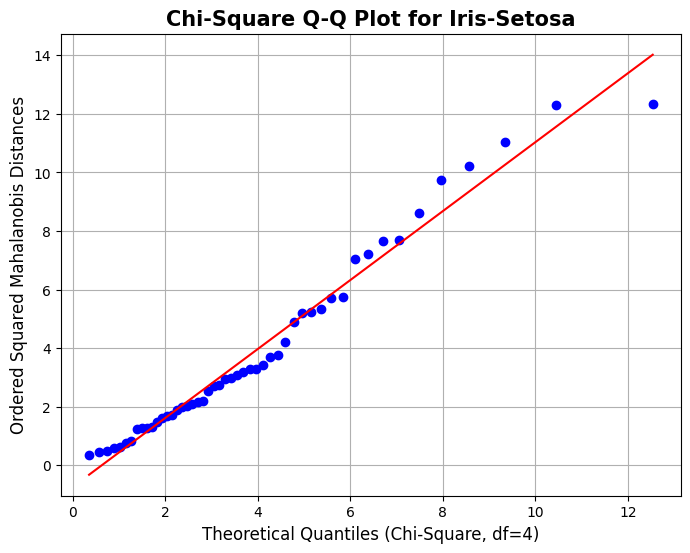

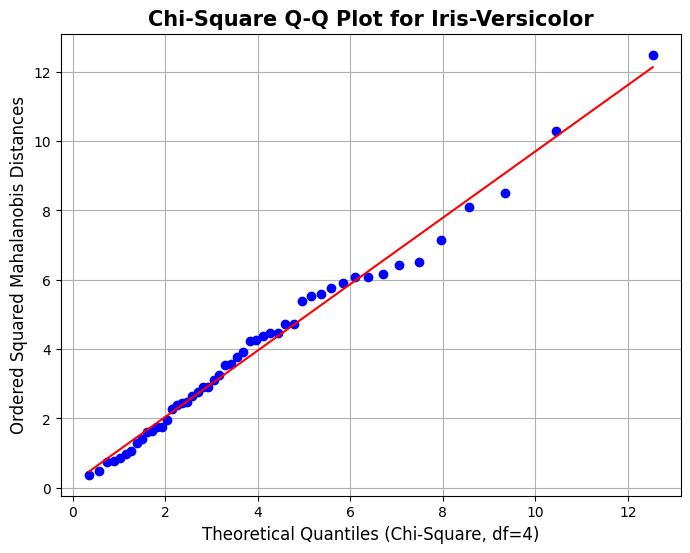

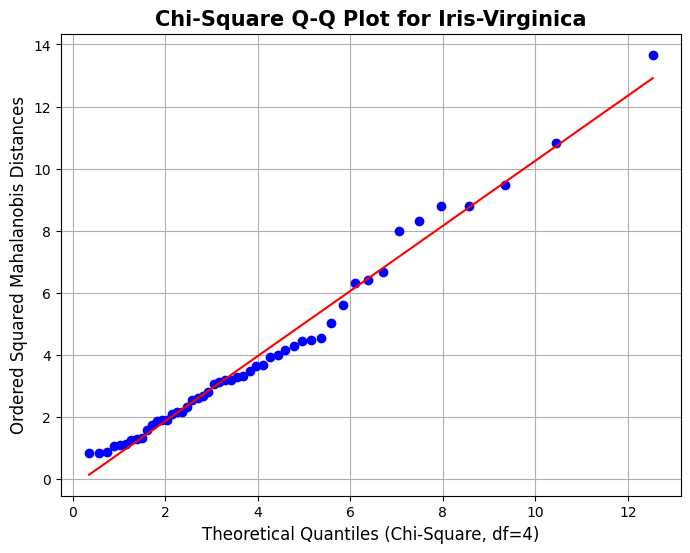

In [7]:
for species in species_list:
    # Filter the DataFrame to get data for the current species.
    species_df = df[df['species'] == species]
    
    # Select only the feature columns (sepal length, etc.).
    X = species_df.iloc[:, :4].values

    # --- 3. Calculate Mahalanobis Distance (from your code) ---
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    cov_matrix = np.cov(X_scaled, rowvar=False)
    # Add a small value to the diagonal for numerical stability if needed
    # cov_matrix = cov_matrix + np.eye(cov_matrix.shape[0]) * 1e-6 
    inv_cov_matrix = np.linalg.inv(cov_matrix)
    mean_vector = np.mean(X_scaled, axis=0)

    mahal_dist_sq = np.array([
        (obs - mean_vector).T @ inv_cov_matrix @ (obs - mean_vector)
        for obs in X_scaled
    ])

    # --- 4. Generate the Q-Q Plot ---
    # The degrees of freedom (dof) equals the number of features.
    dof = X.shape[1]

    # Create the probability plot using scipy.stats.probplot.
    plt.figure(figsize=(8, 6))
    stats.probplot(mahal_dist_sq, dist="chi2", sparams=(dof,), plot=plt)

    # Use a dynamic title for each species.
    plt.title(f'Chi-Square Q-Q Plot for Iris-{species.capitalize()}', fontsize=15, weight='bold')
    plt.xlabel(f'Theoretical Quantiles (Chi-Square, df={dof})', fontsize=12)
    plt.ylabel('Ordered Squared Mahalanobis Distances', fontsize=12)
    plt.grid(True)
    plt.show()


In [8]:
# Of course. Here is the list of methods organized by their typical computational power requirements.

# Low Computational Power (Fast & Efficient) ⚡

# These methods are ideal for quick visual checks, preliminary analysis, or when working with very large datasets. They rely on direct calculations and plotting rather than complex statistical procedures.

#     Marginal Plots: The fastest check. This involves creating a histogram or univariate Q-Q plot for each feature. It's computationally cheap because it's just a series of simple, one-dimensional plots.

#     Chi-Square Q-Q Plot: A very fast visual method. It requires calculating Mahalanobis distances and plotting them, which is a non-iterative and efficient process.

#     Scatter Plot Matrix: Creates a grid of 2D scatter plots. The speed depends on the number of features, as it scales quadratically, but it's very fast for a low-to-moderate number of variables.

# Medium Computational Power (Balanced) ⚖️

# These formal tests provide a good balance between statistical rigor and computational speed. They are suitable for most standard data science workflows.

#     Royston's H Test: An efficient formal test that extends the Shapiro-Wilk test. It's generally faster than more complex alternatives while still being quite powerful.

#     Mardia's Test: This classic test for multivariate skewness and kurtosis is often implemented very efficiently. It's typically faster than tests that analyze the entire data distribution at once.

#     Energy Test (E-statistic): A modern, non-parametric test that is often both powerful and computationally efficient, making it a strong choice for many situations.

# High Computational Power (Rigorous but Slow) 🐢

# These tests are very thorough but can be slow, especially on datasets with many observations or features. They are best used when high statistical rigor is required and computational time is not a major constraint.

#     Henze-Zirkler Test: A powerful and popular test that provides a very rigorous check. Its complexity means it can be one of the more computationally intensive methods, especially with large N (samples) and D (dimensions).

#     Doornik-Hansen Test: This test is known for its good properties but involves calculations based on transformations of the data that can be more demanding, placing it in the higher-end computational bracket.